### Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

### Analysing Basic Metrices

In [2]:
df=pd.read_csv(r'D:\SQL\Data Analytics\Aerofit.csv')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [17]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


#### Shape of dataset

In [6]:
df.shape

(180, 9)

In [8]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 180
Number of Columns: 9


In [11]:
print("Columns in dataset:\n",df.columns)

Columns in dataset:
 Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Datatypes of Columns

In [16]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### Statistical summary

In [15]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Checking Null Vaues

In [20]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [21]:
df.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

#### Insights

1. There are 180 rows and 9 columns.
2. There are no null values in the dataset.
3. There are 3 unique products in the dataset.
4. KP281 is the top frequented product.
5. Minimum age among people purchasing products is 18 and maximum age is 50.
6. Out of all people purchasing the products 104 are male and rest are female.
7. Most of the people buying the products have <=16 years of education.
8. Out of 180 people 107 are married.
9. Standard Devition of Income and Miles are very high.

### Non-Graphical Analysis: Value counts and unique attributes

In [4]:
df['Product'].value_counts()/df.shape[0]

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [24]:
df['Age'].value_counts()

25    25
23    18
26    12
24    12
28     9
33     8
35     8
30     7
38     7
22     7
21     7
27     7
34     6
31     6
29     6
40     5
20     5
32     4
19     4
37     2
45     2
48     2
47     2
50     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
18     1
Name: Age, dtype: int64

In [3]:
df['Gender'].value_counts()/df.shape[0]

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [26]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [27]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [28]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [29]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [30]:
df['Income'].value_counts()

45480    14
52302     9
53439     8
54576     8
46617     8
         ..
58516     1
85906     1
29562     1
68220     1
54781     1
Name: Income, Length: 62, dtype: int64

In [23]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
113     8
94      8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
38      3
170     3
74      3
103     3
132     2
141     2
300     1
280     1
21      1
240     1
80      1
212     1
360     1
112     1
140     1
169     1
188     1
260     1
Name: Miles, dtype: int64

#### Insights

1. Maximum number of people buying products fall into age bracket of 20 to 26
2. Maximum number of people buying products have 16 to 18 years of education.
3. Maximum number of people plan to use treadmill 3 to 4 times each week.
4. Maximum number of people have annual income of 45480 $.
5. Maximum number of people plan to walk 85 to 95 miles per week.


### Visual Analysis - Univariate & Bivariate

#### Univariate (Numerical (Quantitative))

Age

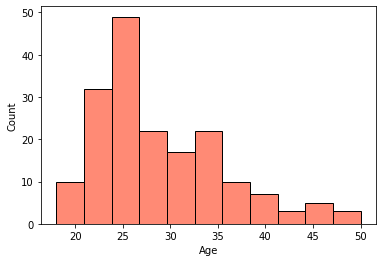

In [91]:
sns.histplot(data=df, x="Age",color="tomato")

Education

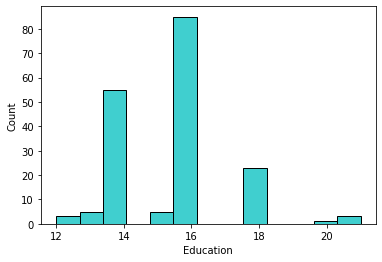

In [92]:
sns.histplot(data=df, x="Education", color="c")

Usage

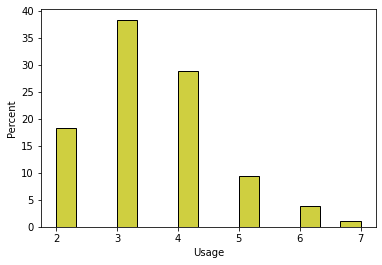

In [93]:
sns.histplot(data=df, x="Usage",stat = 'percent',  color="y")

Fitness

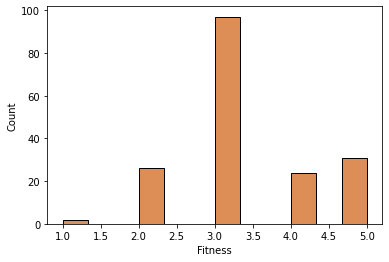

In [94]:
sns.histplot(data=df, x="Fitness",  color="chocolate")

Income

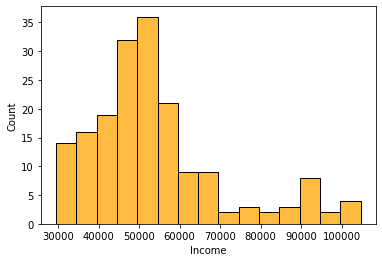

In [95]:
sns.histplot(data=df, x="Income", color="orange")

Miles

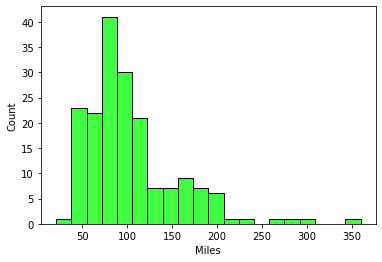

In [96]:
sns.histplot(data=df, x="Miles", color="lime")

#### Univariate (Categorical)

Product Purchased

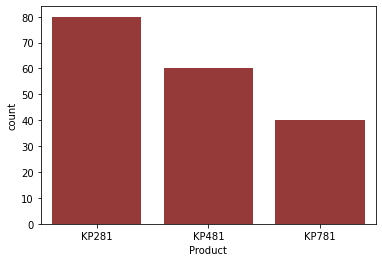

In [42]:
sns.countplot(data=df, x='Product',color="brown")

Gender

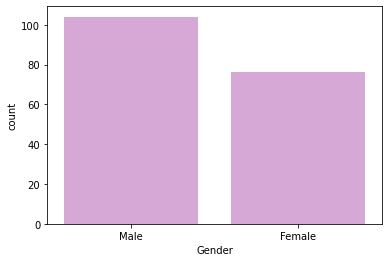

In [48]:
sns.countplot(data=df, x='Gender',color="plum")

Marital Status

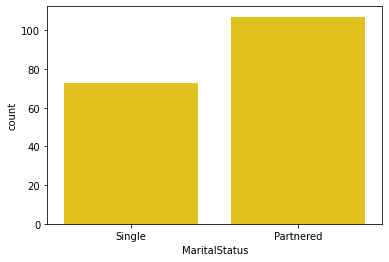

In [50]:
sns.countplot(data=df, x='MaritalStatus',color="gold")

#### Insight

Age
1. Most of the people are aged between 20 and 30
2. least number of people are aged between 40 and 50
3. People between age 20 and 30 constitute large customer base.

Education
1. People having 16 years of education are more ,then 14 and then 18.
2. People 14 to 18 years of education constitute large customer base.

Usage
1. 40% of customers who use treadmills three days a week and about 30% who use them four days a week.

Fitness
1. Maximum number of people consider themselves as average in fitness scale.

Income
1. Majority of the customers earn in between 35000 and 60000 dollars 

Miles
1. Majority of customer expects to walk/run 50 to 100 miles each week.

Product 
1. There are 3 Products named KP281, KP481, KP781,
2. Most popular and most purchased product is KP281

Gender
1. Most of the products were purchased by males

MaritalStatus
1. Majority of people are partnered.

### Bivariate Analysis

 What features have an  effect on the product purchased?

How does Gender affect Product Purchased? 

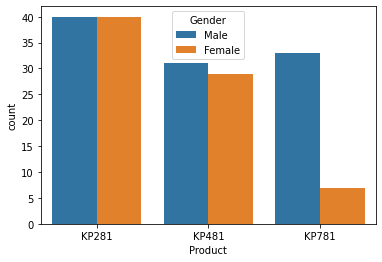

In [58]:
sns.countplot(data = df, x = 'Product', hue = 'Gender')

##### Insight

Most People buy KP201 treadmill
Almost equal ratio of Men and women buy both KP281and KP 481
The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.

How does Fitness scale  affect Product Purchased?

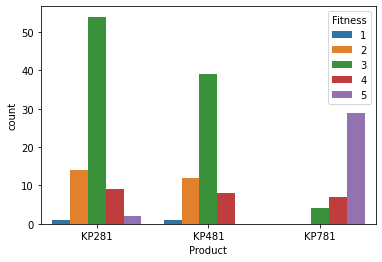

In [131]:
sns.countplot(data = df, x = 'Product', hue = 'Fitness')

##### Insight

1. Customers in fitness levels 3 are more likely to buy KP281 and KP 481, and are least interested in buying KP781.
2. Customers in fitness levels 5 are more likely to buy KP781 and least likely interested in buying KP281 and KP481.
3. Customers in fitness levels 2 are almost not at all interested in buying KP781 and areequally likely to buy KP281 and KP481.

How does Age  affect Product Purchased?

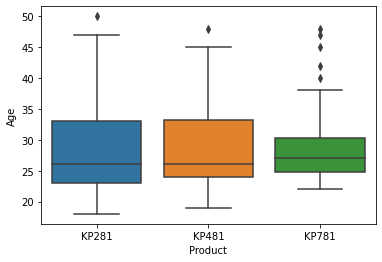

In [64]:
sns.boxplot(data=df, x="Product", y="Age")

##### Insight

1. Customers purchasing products KP281 and KP481 have the same Age median value.
2. People within age group of 25 to 30 are more likely to buy KP781

How does Marital Status affect Product Purchased?

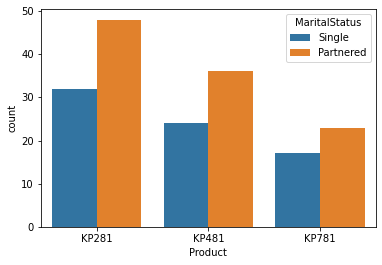

In [132]:
sns.countplot(data=df, x='Product', hue='MaritalStatus')

##### Insights

People who are partnered are more likely to purchase products compared to Singles.


How does Education affect Product Purchased?

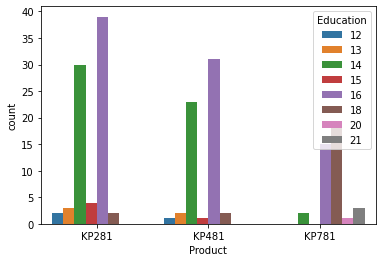

In [133]:
sns.countplot(data=df, x='Product', hue='Education')

##### Insights

1. Majority of People having 16 years of Education are likely to buy KP281 and KP481 and less likely to buy KP781 compared to KP281 and KP 481
2. Majority of people having 14 years of Education are buying KP281 and KP481 and are among the least number of buyers of KP781.
3. Most of KP781 are bought by people with 18 years of Education.

How does income affect Product Purchased?

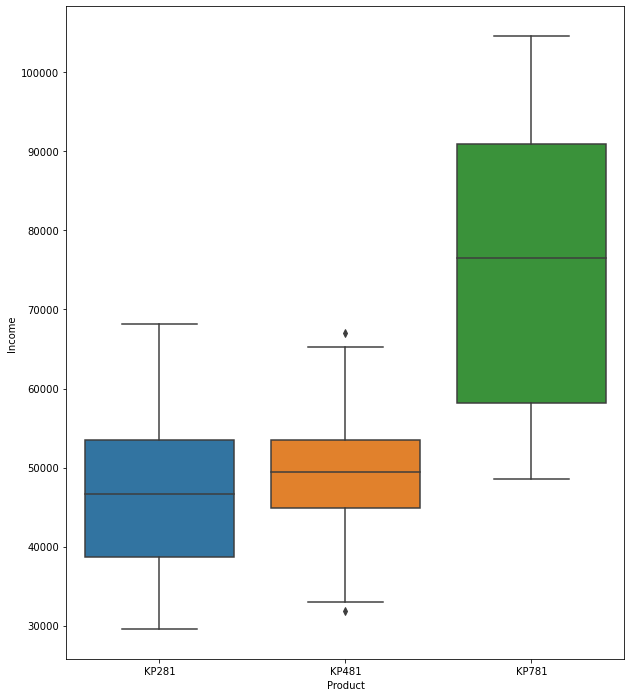

In [141]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df, x="Product", y="Income")

##### Insight

1. The customers with high annual salary (60k and above) are more likely to buy KP781.
2. The customers with annual salary < 60k are more likely to buy KP281 and KP481.

How does Usage affect Product Purchased?

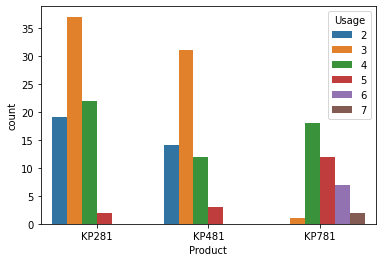

In [142]:
sns.countplot(data=df, x='Product', hue='Usage')

##### Insight

1. People who expect to use product 3 times a day are more likely to buy KP281 and KP481 and least likely to buy KP781.
2. People who expect to run 5 ,6 or 7 times a week are more likely to buy KP781

How does Miles affect Product Purchased?

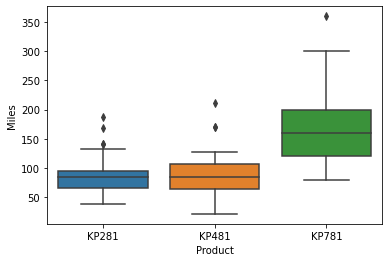

In [143]:
sns.boxplot(data=df, x="Product", y="Miles")

##### Insight

1. People  expects to walk/run 55 to 100 Miles per week, are likely to buy  KP281 0r KP481 product
2. People  expects to walk/run  120 to 200 Miles per week, are likely to buy  KP781 product.

#### Coorelation between  quantities

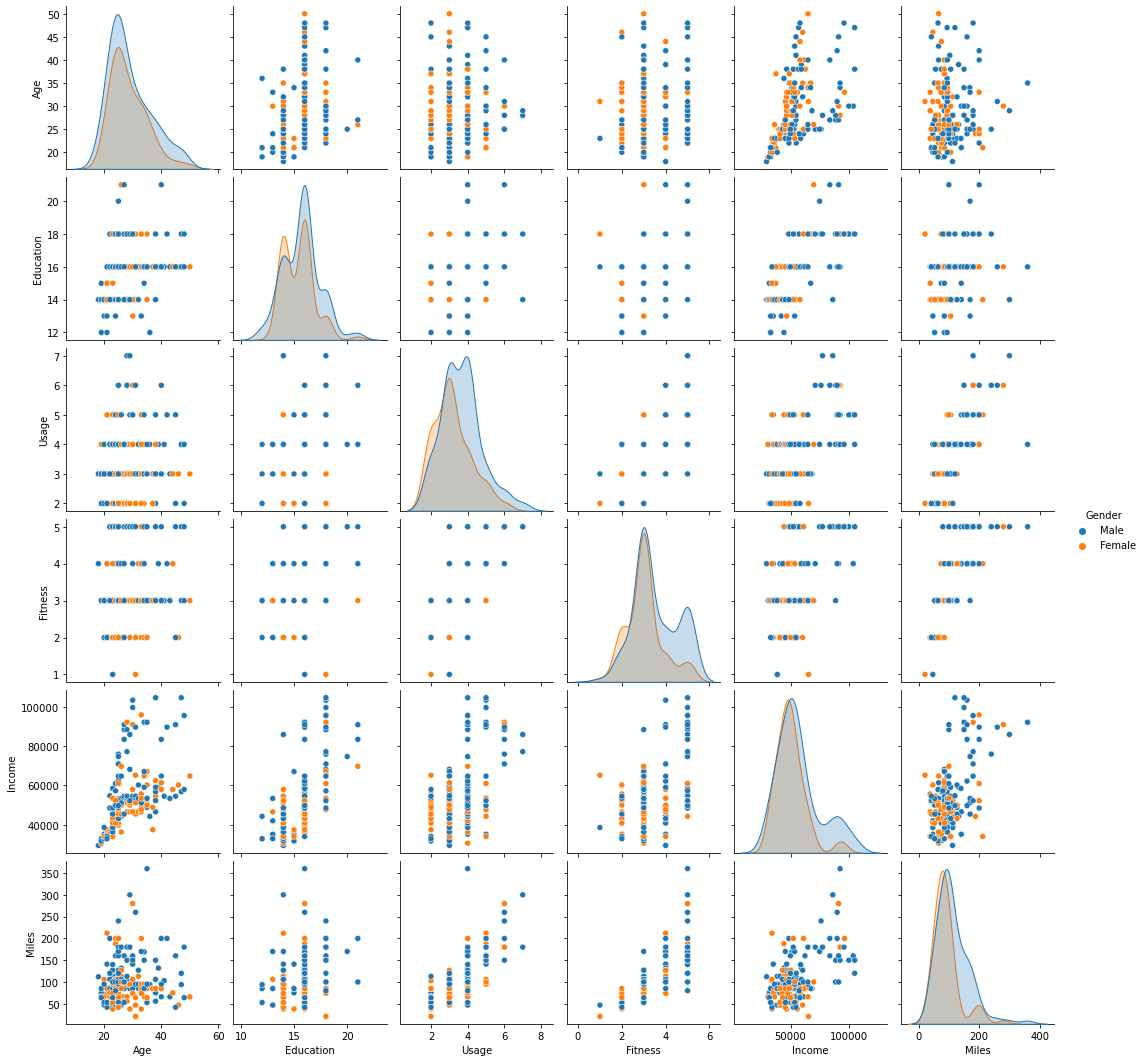

In [66]:
sns.pairplot(data = df,hue="Gender")

In [68]:
df1=df.drop(['Product', 'Gender','MaritalStatus'], axis=1)

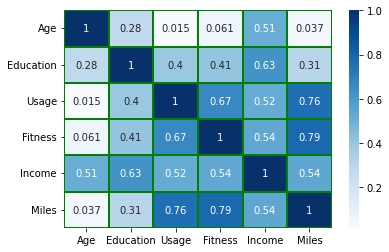

In [80]:
sns.heatmap(df1.corr(),annot=True,cmap="Blues",linewidths=1.0,linecolor="green")

#### Insight

1. People who expects to use the treadmill more times in a week generally expects to walk or run more miles in the week.
2. People with high education are mostly earning high income.
3. People who rated themselves high on fitness scale are expected to run more miles.
4. People who are expected to use treadmill more frequently are expected to run more miles.

#### Outlier Detection 

Age

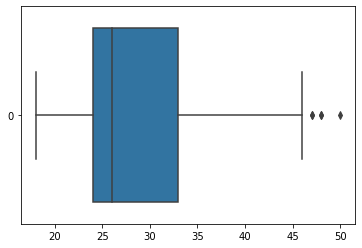

In [82]:
sns.boxplot(data = df["Age"],orient="h")

Education

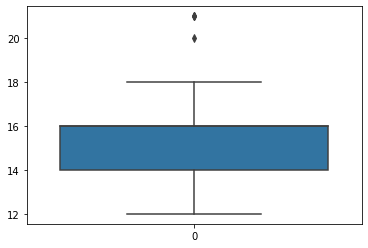

In [83]:
sns.boxplot(data=df["Education"])

Usage

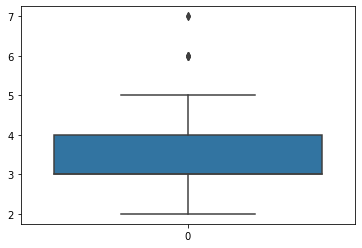

In [84]:
sns.boxplot(data=df["Usage"])

Fitness

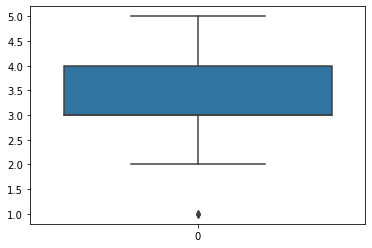

In [85]:
sns.boxplot(data=df["Fitness"])

Income

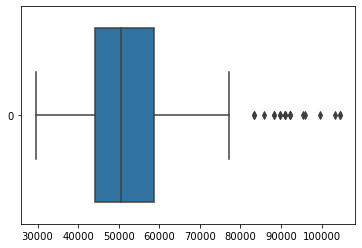

In [87]:
sns.boxplot(data=df["Income"], orient="h")

Miles

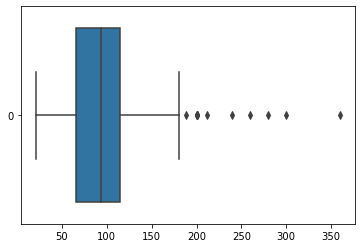

In [89]:
sns.boxplot(data=df["Miles"],orient="h")

#### Insights

  Income and Miles have many outliers compared to Age , Usage, Fitness and Education which have a very few outliers

### Customer Profiling for Each Product

##### for KP281

1. The KP281 is an entry-level treadmill that sells for 1,500 dollars .
2. This Product is Preferred by Men and Women equally.
3. It is mostly preferrred by people in fitness level 2,3 and 4
4. It is mostly bought by people of age group 20 to 32
5. Mostly bought by people having education of 14 or 16 years
6. People earning between 39 to 53 thousand dollars prefer this product.
7. People expecting to use 2,3 or 4 times a week prefer this product.
8. People who expect to run 70 to 90 miles per week prefer this product.

##### for KP481

1. The KP481 is  for mid-level runners that sell for  1,750. dollars .
2. This Product is Preferred by Men and Women equally.
3. It is mostly preferrred by people in fitness level 1,2,3 and 4
4. It is mostly bought by people of age group 20 to 32
5. Mostly bought by people having education of 14 or 16 years
6. People earning between 45 to 555 thousand dollars prefer this product , with average of 29000 dollars.
7. People expecting to use 2,3,4 or 5 times a week prefer this product.
8. People who expect to run 70 to 120  miles per week prefer this product.

##### for KP781

1. The KP781 treadmill is having advanced features that sell for 2,500. dollars .
2. This Product is bought mostly by Men.
3. Its women customer base is very low
3. It is mostly preferrred by people in fitness level 3,4 and 5.
4. It is mostly bought by people of age group 25 to 30
5. Mostly bought by people having education of 16 or 18 years
6. People earning between >= 60 thousand dollars prefer this product.
7. People expecting to use  4,5,6 or 7 times a week mostly prefer this product.
8. People who expect to run 120 to 200 miles per week prefer this product.

### Probability

#### Marginal Probability 

In [97]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [98]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [99]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [100]:
df['Age'].value_counts(normalize=True)

25    0.138889
23    0.100000
26    0.066667
24    0.066667
28    0.050000
33    0.044444
35    0.044444
30    0.038889
38    0.038889
22    0.038889
21    0.038889
27    0.038889
34    0.033333
31    0.033333
29    0.033333
40    0.027778
20    0.027778
32    0.022222
19    0.022222
37    0.011111
45    0.011111
48    0.011111
47    0.011111
50    0.005556
36    0.005556
39    0.005556
41    0.005556
42    0.005556
43    0.005556
44    0.005556
46    0.005556
18    0.005556
Name: Age, dtype: float64

In [101]:
df['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [102]:
df['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [103]:
df['Income'].value_counts(normalize=True)

45480    0.077778
52302    0.050000
53439    0.044444
54576    0.044444
46617    0.044444
           ...   
58516    0.005556
85906    0.005556
29562    0.005556
68220    0.005556
54781    0.005556
Name: Income, Length: 62, dtype: float64

In [104]:
df['Miles'].value_counts(normalize=True)

85     0.150000
95     0.066667
66     0.055556
75     0.055556
47     0.050000
106    0.050000
113    0.044444
94     0.044444
53     0.038889
100    0.038889
56     0.033333
64     0.033333
180    0.033333
200    0.033333
127    0.027778
160    0.027778
42     0.022222
150    0.022222
120    0.016667
38     0.016667
170    0.016667
74     0.016667
103    0.016667
132    0.011111
141    0.011111
300    0.005556
280    0.005556
21     0.005556
240    0.005556
80     0.005556
212    0.005556
360    0.005556
112    0.005556
140    0.005556
169    0.005556
188    0.005556
260    0.005556
Name: Miles, dtype: float64

#### Insights

1. Probability of KP281 being bought is:0.444444, KP481 is:0.333333, KP781 is:0.222222.
2. Probability of a customer being male is:0.577778 , and female is:0.422222. 
3. Probability of a customer being married is:0.594444  and  single is:0.405556.
4. Customer has high probability of being 25 years old with probability of 0.13
5. Probability of customer being at level 3 fitness is:0.538889  level 5 is:0.172222, level 2 is:0.144444, level 4:0.133333, level 1 is:0.011111 .
6. With high probability of 0.077 a customer has annual income of 45480 dollars, income followed by 52302 dollars then  53439 dollars etc
7. With high probability of 0.015 a customer isexpected to run 85 miles per week.
8.Probability of treadmill being used 3 days in a week is:0.383333, 4 days/week:0.288889, 2 days/week:0.183333 , 5 days/week:0.094444, 6 days/week:0.038889, 7 days/week: 0.011111. ,
    

#### Conditional Probability

Probability of each Proguct given Marital status

In [114]:
pd.crosstab(df['Product'],df['MaritalStatus'], normalize='columns')


MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


Probability rounded off to 2 digits
1. P(KP281/Single): 0.44
2. P(KP281/Partnered): 0.45
    
3. P(KP481/Single): 0.33
4. P(KP481/Partnered): 0.34
    
5. P(KP781/Single): 0.23
6. P(KP781/Partnered): 0.21

Probability of buying a specific product provided the customer is of specific marital status 

In [115]:
pd.crosstab(df['MaritalStatus'],df['Product'], normalize='columns')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.6,0.6,0.575
Single,0.4,0.4,0.425


Probability rounded off to 2 digits

1. P(Single/KP281): 0.4
2. P(Partnered/KP281): 0.6

3. P(Single/KP481): 0.4
4. P(Partnered/KP481): 0.6

5. P(Single/KP781): 0.42
6. P(Partnered/KP781): 0.57

Probability of each Proguct given Gender

In [116]:
pd.crosstab(df['Product'],df['Gender'], normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


Probability rounded off to 2 digits
1. P(KP281/Male): 0.38
2. P(KP281/Female): 0.52
    
3. P(KP481/Male): 0.30
4. P(KP481/female): 0.38
    
5. P(KP781/Male): 0.32
6. P(KP781/female): 0.09

probability of that the customer is of specific gender provided specific product is bought 

In [117]:
pd.crosstab(df['Gender'],df['Product'], normalize='columns')

Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.483333,0.175
Male,0.5,0.516667,0.825


Probability rounded off to 2 digits

1. P(Female/KP281): 0.5
2. P(Male/KP281): 0.5

3. P(Female/KP481): 0.48
4. P(Male/KP481): 0.52

5. P(female/KP781): 0.17
6. P(Male/KP781): 0.82

Probability of each Proguct given Fitness Level

In [120]:
pd.crosstab(df['Product'],df['Fitness'], normalize='columns')

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


Probability rounded off to 2 digits
1. P(KP281/1): 0.5
2. P(KP281/2): 0.54
3. P(KP281/3): 0.55
4. P(KP281/4): 0.37
5. P(KP281/5): 0.06

1. P(KP481/1): 0.5
2. P(KP481/2): 0.46
3. P(KP481/3): 0.40
4. P(KP481/4): 0.33
5. P(KP481/5): 0.00

1. P(KP781/1): 0.0
2. P(KP781/2): 0.0
3. P(KP781/3): 0.41
4. P(KP781/4): 0.29
5. P(KP781/5): 0.93


probability of that the customer has a specific fitness scale provided specific product was bought 

In [119]:
pd.crosstab(df['Fitness'],df['Product'], normalize='columns')

Product,KP281,KP481,KP781
Fitness,,,
1,0.0125,0.016667,0.000
2,0.1750,0.200000,0.000
3,0.6750,0.650000,0.100
4,0.1125,0.133333,0.175
5,0.0250,0.000000,0.725


Probability rounded off to 3 digits
1. P(1/KP281): 0.012
2. P(2/KP281): 0.017
3. P(3/KP281): 0.675
4. P(4/KP281): 0.112
5. P(5/KP281): 0.025

1. P(1/KP481): 0.016
2. P(2/KP481): 0.200
3. P(3/KP481): 0.650
4. P(4/KP481): 0.133
5. P(5/KP481): 0.000

1. P(1/KP781): 0.000
2. P(2/KP781): 0.000
3. P(3/KP781): 0.100
4. P(4/KP781): 0.175
5. P(5/KP781): 0.725


Probability of each Proguct given Age

In [123]:
print("The Probability of each Proguct given Age are as follows")
pd.crosstab(df['Product'],df['Age'], normalize='columns')

The Probability of each Proguct given Age are as follows


Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1.0,0.75,0.4,0.571429,0.571429,0.444444,0.416667,0.28,0.583333,0.428571,...,0.2,1.0,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0
KP481,0.0,0.25,0.6,0.428571,0.000000,0.388889,0.250000,0.44,0.250000,0.142857,...,0.6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
KP781,0.0,0.00,0.0,0.000000,0.428571,0.166667,0.333333,0.28,0.166667,0.428571,...,0.2,0.0,1.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0


probability of  the customer age  provided specific product was bought

In [124]:
print("The Probability of each Age given Product are as follows")
pd.crosstab(df['Age'], df['Product'],normalize='columns')

The Probability of each Age given Product are as follows


Product,KP281,KP481,KP781
Age,,,
18,0.0125,0.000000,0.000
19,0.0375,0.016667,0.000
20,0.0250,0.050000,0.000
21,0.0500,0.050000,0.000
22,0.0500,0.000000,0.075
23,0.1000,0.116667,0.075
24,0.0625,0.050000,0.100
25,0.0875,0.183333,0.175
26,0.0875,0.050000,0.050


Probability of each Proguct given Income

In [130]:
print("The Probability of each Proguct givenIncome are as follows")
pd.crosstab(df['Product'],df['Income'], normalize='columns')

The Probability of each Proguct givenIncome are as follows


Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,85906,88396,89641,90886,92131,95508,95866,99601,103336,104581
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1.0,1.0,0.5,0.6,0.4,1.0,0.75,1.0,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KP481,0.0,0.0,0.5,0.4,0.6,0.0,0.25,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KP781,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


probability of customer Income provided specific product was bought

In [126]:
print("The Probability Income value given Product are as follows")
pd.crosstab(df['Income'],df['Product'], normalize='columns')

The Probability Income value given Product are as follows


Product,KP281,KP481,KP781
Income,,,
29562,0.0125,0.000000,0.000
30699,0.0125,0.000000,0.000
31836,0.0125,0.016667,0.000
32973,0.0375,0.033333,0.000
34110,0.0250,0.050000,0.000
...,...,...,...
95508,0.0000,0.000000,0.025
95866,0.0000,0.000000,0.025
99601,0.0000,0.000000,0.025


Probability of each Proguct given Usage

In [128]:
print("The Probability of Product given usage are as follows")
pd.crosstab(df['Product'],df['Usage'], normalize='columns')

The Probability of Product given usage are as follows


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


probability of Usage provided specific product was bought

In [129]:
print("The Probability Usage given Product are as follows")
pd.crosstab(df['Income'],df['Product'], normalize='columns')

The Probability Usage given Product are as follows


Product,KP281,KP481,KP781
Income,,,
29562,0.0125,0.000000,0.000
30699,0.0125,0.000000,0.000
31836,0.0125,0.016667,0.000
32973,0.0375,0.033333,0.000
34110,0.0250,0.050000,0.000
...,...,...,...
95508,0.0000,0.000000,0.025
95866,0.0000,0.000000,0.025
99601,0.0000,0.000000,0.025


### Recommendations

1. Promotional offers or Ads can be introduced to increase women buyers of KP781.
2. Advertisements to encourage buying KP781 among people with fitness level 2, 3 should be made informing them about how the advanced features help them to stay fit in the long run.
3. To increase the customers of age range 35 and above Health camps can be organised where they can be made aware of the increasing health issues with increasing age and encourage them to take walks regularly to stay fit.
4. During Festivities or some special ocassions KP781 can be released at some discount price so that people with income < 60000$ could but them and increase its sale.
